# "Human or Robot" 
## Predicting Auction Fraud

On an auction website, human bidders are becoming increasingly frustrated with their inability to win auctions vs. their software-controlled counterparts. As a result, usage from the site's core customer base is plummeting. In order to rebuild customer happiness, the site owners need to eliminate computer generated bidding from their auctions.

The goal is to identify online auction bids that are placed by "robots", helping the site owners easily flag these users for removal from their site to prevent unfair auction activity.


<img src="../images/robots-greeting.png" width="500">

## EXPLORATORY DATA ANALYSIS 

## Initial hypothesis:
1. Total number of bids: Robots might have significantly higher number of bids than humans.
2. Number of bids per auction: Robots might have higher number of bids each auction.
3. Response time: Robots might bid more often, so time between each bid will be shorter than for humans' bid.
4. Distinct IPs: Robots might bid from more diverse IP addresses.
5. Merchandise: Robots might bid more often on certain merchandises. 

In [1]:
# import packages
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# load dfs
train = pd.read_csv('../data/train.csv')
auction_df = pd.read_csv('../large_data/auction_df')
auction_df

,bid_id,auction,merchandise,device,time,country,ip,url,bidder_id,payment_account,address,outcome
0,85371.0,yitr4,home goods,phone35,9.759489e+15,ke,82.34.177.248,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
1,274487.0,btpyy,home goods,phone1004,9.760249e+15,zm,202.130.71.167,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
2,527436.0,kj2ko,home goods,phone4,9.762261e+15,ke,22.54.76.225,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
3,554135.0,1m5t8,home goods,phone4,9.762431e+15,ke,32.13.237.126,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
4,607628.0,btpyy,home goods,phone4,9.762789e+15,ke,202.236.188.240,vasstdc27m7nks3,91a3c57b13234af24875c56fb7e2b2f4rb56a,a3d2de7675556553a5f08e4c88d2c228754av,a3d2de7675556553a5f08e4c88d2c228vt0u4,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3071219,609792.0,jefix,mobile,phone316,9.762802e+15,id,28.18.7.49,ar89au37swuzvzz,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0
3071220,2297899.0,jefix,mobile,phone33,9.772601e+15,id,161.237.171.157,ar89au37swuzvzz,c806dbb2decba0ed3c4ff5e2e60a74c2wjvbl,a3d2de7675556553a5f08e4c88d2c22856leq,d02c2b288b8aabd79ff47118aff41a2dqwzwc,0.0
3071221,3400601.0,jqx39,office equipment,phone11,9.636754e+15,sa,54.212.21.87,cgb17jpn1ixq9hw,0381a69b7a061e9ace2798fd48f1f537mgq57,fd87037ce0304077079c749f420f0b4c54uo0,f030a221726fbcdfc4dc7dfd1b381a112hieq,0.0
3071222,2007255.0,ntjde,jewelry,phone59,9.770756e+15,ru,79.72.96.0,9ov8hm82p20sxlz,84a769adc98498f52debfe57b93a0789556f4,fbe0ce34d6546ebd9e4c63afc68b085byd2tf,a3d2de7675556553a5f08e4c88d2c228fib6p,0.0


In [3]:
auction_df.columns

Index(['bid_id', 'auction', 'merchandise', 'device', 'time', 'country', 'ip',
       'url', 'bidder_id', 'payment_account', 'address', 'outcome'],
      dtype='object')

### Descriptive Statistics
- Total number of unique values per feature.

In [4]:
# total number of unique values
total_bidders = auction_df['bidder_id'].nunique()
total_bids = auction_df['bid_id'].nunique()
total_devices = auction_df['device'].nunique()
total_ips = auction_df['ip'].nunique()
total_urls = auction_df['url'].nunique()
total_merchandise = auction_df['merchandise'].nunique()
total_country = auction_df['country'].nunique()
total_auction = auction_df['auction'].nunique()

# print statements
print("Number of total bidders: {:,}".format(total_bidders))
print("Number of total bids: {:,}".format(total_bids))
print("Number of devices: {:,}".format(total_devices))
print("Number of IPs: {:,}".format(total_ips))
print("Number of URLs: {:,}".format(total_urls))
print("Number of merchandise categories: {:,}".format(total_merchandise))
print("Number of countries: {:,}".format(total_country))
print("Number of auctions: {:,}".format(total_auction))

Number of total bidders: 1,984
Number of total bids: 3,071,224
Number of devices: 5,729
Number of IPs: 1,030,950
Number of URLs: 663,873
Number of merchandise categories: 10
Number of countries: 199
Number of auctions: 12,740


**Proportion of Fraudulent vs. Legitimate Bids**

In [5]:
# proportions
legitimate_bids = len(auction_df[auction_df['outcome'] == 0.0])
fraudulent_bids = len(auction_df[auction_df['outcome'] == 1.0])

legitimate = legitimate_bids/total_bids
fraud = fraudulent_bids/total_bids

# print
print("Proportion of legitimate bids: {:.2%}".format(legitimate))
print("Proportion of fraudulent bids: {:.2%}".format(fraud))

Proportion of legitimate bids: 86.57%
Proportion of fraudulent bids: 13.43%


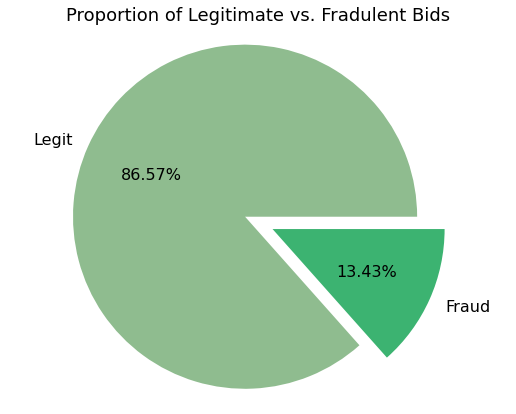

In [6]:
import matplotlib.pyplot as plt

#add colors
colors = ['darkseagreen', 'mediumseagreen']

# graph legit vs. fraud bids
_, ax = plt.subplots(figsize=(9, 7))

# pie chart parameters
pie_data = [legitimate, fraud]
pie_labels = ('Legit', 'Fraud')
pie_labels_explode_coefficients = (0, 0.175)

# Show the chart
ax.pie(pie_data, labels=pie_labels, autopct='%1.2f%%', colors=colors,
       shadow=False, explode=pie_labels_explode_coefficients,  textprops={'fontsize': 16})
ax.set_title("Proportion of Legitimate vs. Fradulent Bids", fontsize=18)
plt.axis('equal')
plt.show()

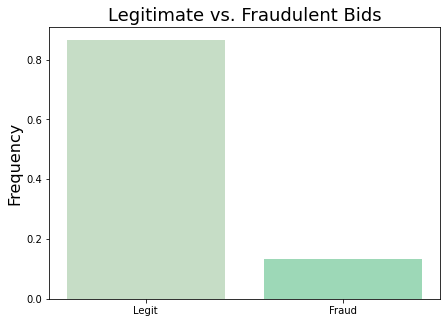

In [7]:
# barplot of piechart
y_leg_fraud = np.arange(len(pie_labels))

plt.subplots(figsize=(7, 5))

plt.bar(y_leg_fraud, pie_data, align='center', alpha=0.5, color=colors)
plt.xticks(y_leg_fraud, pie_labels)
plt.ylabel('Frequency', fontsize=16)
plt.title('Legitimate vs. Fraudulent Bids', fontsize=18)

plt.show()

**Proportion of Human vs. Robot Bidders**

In [8]:
# total
total_bidders = train['bidder_id'].nunique()

# proportions
human_bids = len(train[train['outcome'] == 0.0])
robot_bids = len(train[train['outcome'] == 1.0])

human = human_bids/total_bidders
robot = robot_bids/total_bidders

# print
print("Proportion of human bidders: {:.2%}".format(human))
print("Proportion of robot bidders: {:.2%}".format(robot))

Proportion of human bidders: 94.88%
Proportion of robot bidders: 5.12%


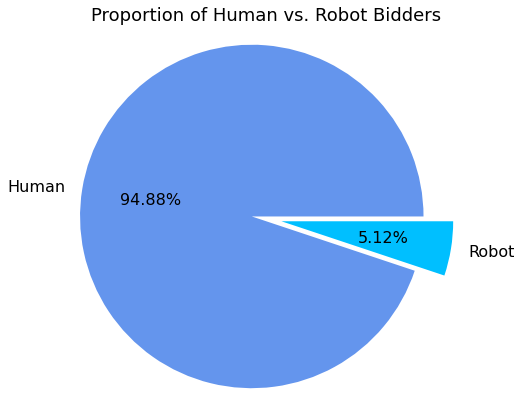

In [9]:
# graph human vs. bot
_, ax = plt.subplots(figsize=(9, 7))

#add colors
colors = ['cornflowerblue', 'deepskyblue']

# pie chart parameters
pie_data = [human, robot]
pie_labels = ('Human', 'Robot')
pie_labels_explode_coefficients = (0, 0.175)

# Show the chart
ax.pie(pie_data, labels=pie_labels, autopct='%1.2f%%', colors=colors,
       shadow=False, explode=pie_labels_explode_coefficients,  textprops={'fontsize': 16})
ax.set_title("Proportion of Human vs. Robot Bidders", fontsize=18)
plt.axis('equal')
plt.show()

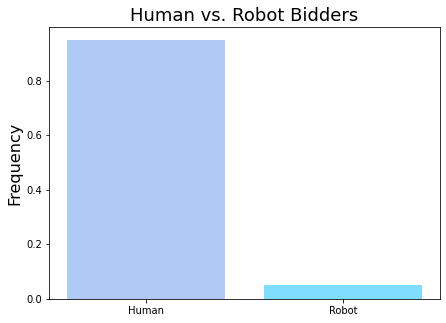

In [10]:
# barplot of piechart
y_hum_bot = np.arange(len(pie_labels))

plt.subplots(figsize=(7, 5))

plt.bar(y_hum_bot, pie_data, align='center', alpha=0.5, color=colors)
plt.xticks(y_hum_bot, pie_labels)
plt.ylabel('Frequency', fontsize=16)
plt.title('Human vs. Robot Bidders', fontsize=18)

plt.show()

**First impressions:**
1. The data is highly unbalanced from both the bidders and bid perspective.
2. Humans represent 94.88% of the data, while only 5.12% are robots.
3. Legitimate bids represent 86.52% of the data, while 13.43% are fraudulent bids.
4. Proportionally robots are putting more bids than humans.
5. There are 12,740 auctions represented in this dataset, and over 3 million bids.
6. Bids come from 5,729 device models in 199 countries, 663,873 URLs and 1,030,950 IP addresses.
7. There are 10 distinct merchandise categories.

**Let's take a look at the spread of the data!**

## Bids, Auction, Country, Device, IPs and URLs

- Mean, median, mode, max, and min value per user.

In [19]:
data_per_user = auction_df.groupby(['bidder_id'])

def get_user_statistics_per_feature(feature_column):
    return data_per_user[feature_column].nunique()

def print_user_statistics_per_feature(feature_name, feature_per_user):
    mean_feature_per_user = feature_per_user.mean()
    median_feature_per_user = feature_per_user.median()
    mode_feature_per_user = feature_per_user.mode()
    max_feature_per_user = feature_per_user.max()
    min_feature_per_user = feature_per_user.min()
    
    print("Mean of {} per user: {:.2f}".format(feature_name, mean_feature_per_user))
    print("Median of {} per user: {}".format(feature_name, median_feature_per_user))
    print("Mode of {} per user: {}".format(feature_name, mode_feature_per_user[0]))
    print("User with more {}: {}".format(feature_name, max_feature_per_user))
    print("User with less {}: {}".format(feature_name, min_feature_per_user))
    print("-----------------------------")
    
    return feature_per_user

features = [('bids', 'bid_id'), ('auctions', 'auction'), ('countries', 'country'), 
                     ('IPs', 'ip'), ('devices', 'device'), ('urls', 'url')]

features_per_user = {}

for feat, column in features:
    features_per_user[column] = get_user_statistics_per_feature(column)
    print_user_statistics_per_feature(feat, features_per_user[column])

Mean of bids per user: 1548.00
Median of bids per user: 18.0
Mode of bids per user: 1
User with more bids: 515033
User with less bids: 1
-----------------------------
Mean of auctions per user: 62.59
Median of auctions per user: 10.0
Mode of auctions per user: 1
User with more auctions: 1623
User with less auctions: 1
-----------------------------
Mean of countries per user: 13.39
Median of countries per user: 3.0
Mode of countries per user: 1
User with more countries: 179
User with less countries: 1
-----------------------------
Mean of IPs per user: 675.04
Median of IPs per user: 12.0
Mode of IPs per user: 1
User with more IPs: 111918
User with less IPs: 1
-----------------------------
Mean of devices per user: 78.60
Median of devices per user: 8.0
Mode of devices per user: 1
User with more devices: 2618
User with less devices: 1
-----------------------------
Mean of urls per user: 346.06
Median of urls per user: 5.0
Mode of urls per user: 1
User with more urls: 81376
User with less 

**Take-away:**

- There's an enormous distance between the mean and the median for three features in particular:
    - **Bids per user** (mean = 1548, median = 18)
    - **IPs per user** (mean = 675, median = 12)
    - **URLs per user** (mean = 346, median = 5)

- There's also a large distance (althought less than the previous) between the mean and median for two features:
    - **Devices per user** (mean = 78, median = 8)
    - **Auctions per user** (mean = 62, median = 10)

- The smallest distance between mean and median is for number of countries per user (mean = 13.39, median = 3).

- All features seem to have a considerably skewed distribution.

- The range for  each feature is also considerably apart with max number of bids per user = 515,033, min = 1, and median = 18. Number of IPs per user and URLs per user show similar spread.

## Visualization
### Distribution per User
**Distribution of features per bidder_id**

Features:
- Bids
- Auctions
- Countries
- IPs
- Devices
- URLs

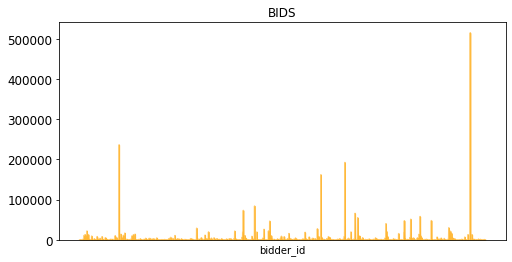

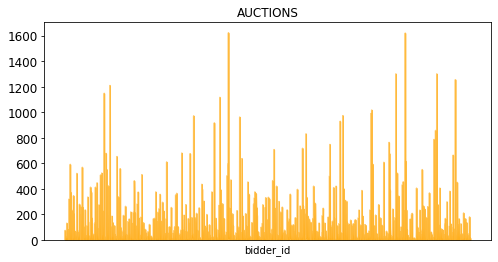

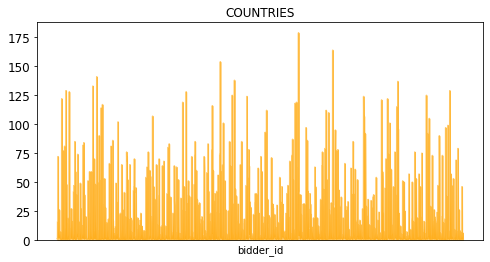

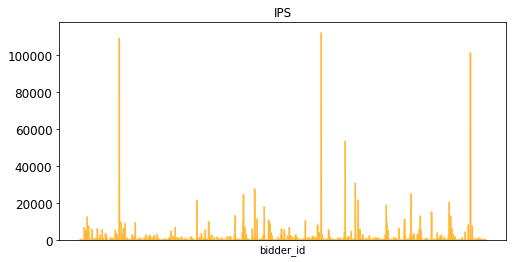

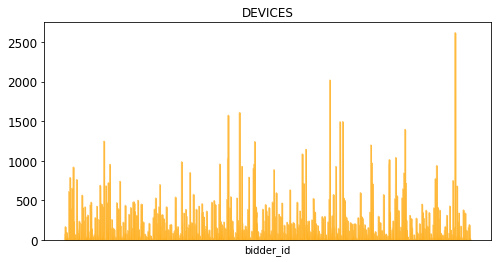

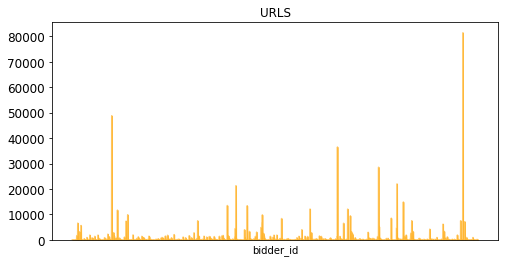

In [20]:
color = ['orange']

for feat, column in features:
    plt.figure(figsize=(8,4))
    plt.xticks([])
    features_per_user[column].plot.area(color=color, 
                                        title=feat.upper(), fontsize=12,
                                       stacked=False)
    plt.show()

**Distribution of features per bidder in descending order**

Below you see a set of graphs per feature showing frequency on the y-axis and bidder_id on the x-axis sorted in ascending order. For the first graph 'BIDS', There is one or very few users with over 500,000 bids and the majority of bidders have closer to 1 bid (bacause all bidders in the dataset have at least 1 bid).

Compared to the set of graphs above, we can observe that few bidders have very high frequency for some of the features we are considering here, while the majority of bidders have very fewer.

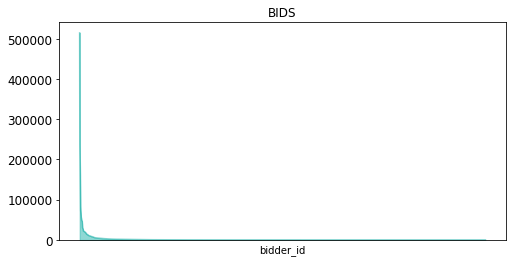

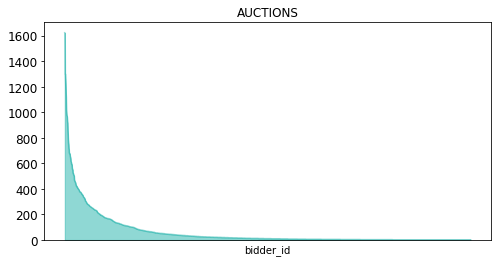

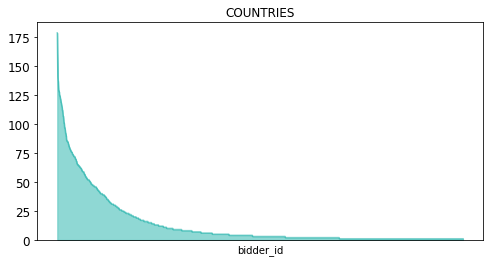

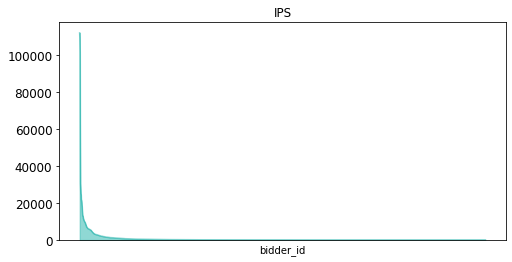

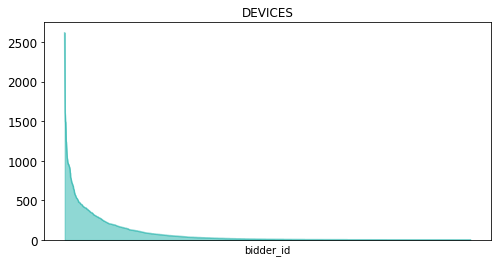

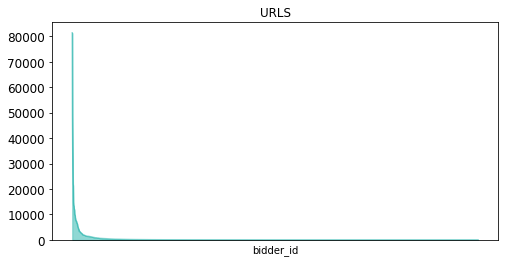

In [21]:
color = ['lightseagreen']

for feat, column in features:
    plt.figure(figsize = (8,4))
    plt.xticks([])
    features_per_user[column].sort_values(ascending = False).plot.area(color = color, 
                                        title = feat.upper(), fontsize = 12,
                                       stacked = False)
    plt.show()

## Bids per Merchandise - Human vs. Robot
- Heatmap with number of bids for human and robots.
- graph robots favorite merchandise.
- graph bids per merchandise from humans and robots.

### Merchandise Heatmap
- Number of Human and Robot bids per Merchandise

In [18]:
# distinct merchandise
auction_df['merchandise'].unique()

array(['home goods', 'office equipment', 'sporting goods',
       'books and music', 'mobile', 'jewelry', 'computers', 'clothing',
       'furniture', 'auto parts'], dtype=object)

In [12]:
merch_df = auction_df[['merchandise', 'outcome']]

# Creating a pivot table with merchandise as index, outcome as columns and count of outcome as values 
merch_human_bot = merch_df.pivot_table(values='outcome', index='merchandise', columns='outcome', fill_value=0, 
                         aggfunc=lambda x: len(x))

# Passing the pivot table to heatmap for visualization
merch_human_bot.style.background_gradient(cmap ='Blues', axis=0)

outcome,0.0,1.0
merchandise,,
auto parts,9757,0
books and music,13733,1509
clothing,476,0
computers,9733,11667
furniture,87807,0
home goods,389249,18708
jewelry,555634,37101
mobile,492350,105138
office equipment,160671,7967


**Take away:**
1. Robots bid heavily on sporting goods and mobile, followed by jewelry, and home goods.
2. Robots did NOT bid on auto parts, clothing, and furniture.
3. Humans have bid on all available categories. They bid heavily on sporting goods (like the robots), jewelry, mobile (like the robots), and home goods.

**Bids Frequency per Merchandise by Robots**

Text(0, 0.5, 'Frequency')

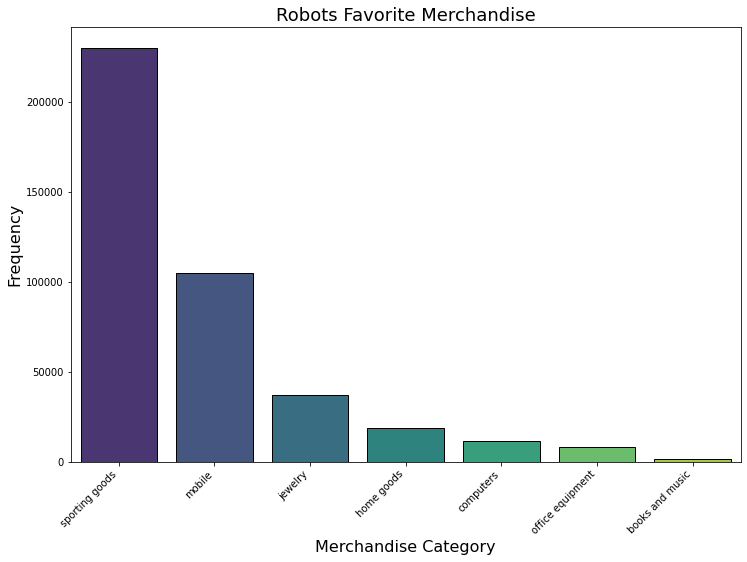

In [13]:
# merchandise robot bids
merch_robots = merch_df[merch_df['outcome'] == 1.0]

order = ['sporting goods', 'mobile', 'jewelry', 'home goods', 'computers', 'office equipment', 'books and music']

f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(x="merchandise",
                   data=merch_robots, order=order, palette="viridis", edgecolor="k")
ax.set_title("Robots Favorite Merchandise", fontsize=18)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right')
ax.set_xlabel("Merchandise Category", fontsize=16)
ax.set_ylabel("Frequency", fontsize=16)

**Comparison of Bids Frequency per Merchandise Human vs. Robot**

Text(0.5, 0, 'Frequency')

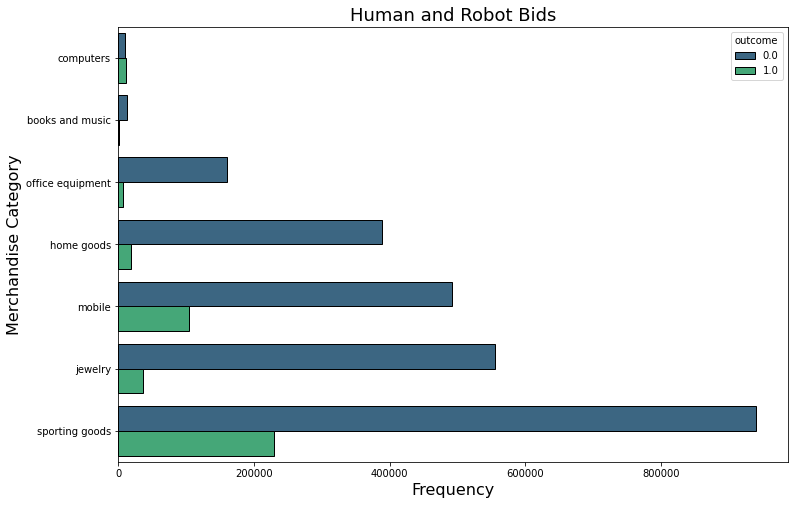

In [14]:
order = [ 'computers', 'books and music', 'office equipment', 'home goods', 'mobile', 'jewelry', 'sporting goods']


f, ax = plt.subplots(figsize=(12, 8))
ax = sns.countplot(y="merchandise", hue="outcome", order=order,
                   data=auction_df, palette="viridis", edgecolor="k")
ax.set_title("Human and Robot Bids", fontsize=18)
ax.set_ylabel("Merchandise Category", fontsize=16)
ax.set_xlabel("Frequency", fontsize=16)

## FEATURE ENGINEERING

------